In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Dimensions de X: (100, 2)
Dimensions de y: (100, 1)


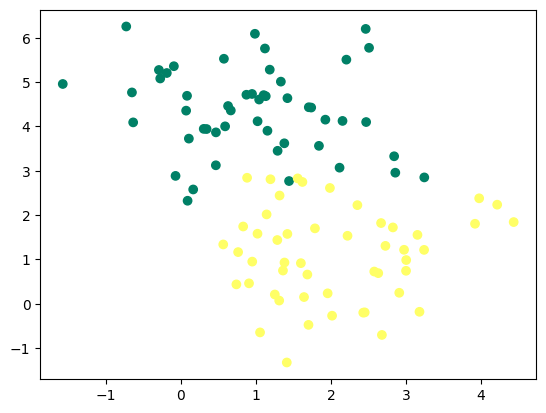

In [2]:
# Creation d'un dataset de 100 elements et de 2 colonnes/features
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print(f'Dimensions de X: {X.shape}')
print(f'Dimensions de y: {y.shape}')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.show()

In [3]:
# Init parameter matrix W, matching features number

def initialisation(X):
	W = np.random.randn(X.shape[1], 1)
	b = np.random.randn(1)
	return W, b

### Modèle
$F(Z) = X \cdot W + b$

### Fonction d'activation
$A = \frac{1}{1 + e^{-Z}}$

In [4]:
def model(X, W, b):
	Z = X.dot(W) + b
	A = 1 / (1 + np.exp(-Z))
	return A

In [5]:
W, b = initialisation(X)
A = model(X, W, b)
A.shape

(100, 1)

## Fonction Coût

$ \mathcal{L} = -\frac{1}{m} \times \sum_{i=1}^m y \times log(A) + (1 - y) \times log(1 - A)$


In [6]:
def log_loss(A, y):
	m = len(y)
	return 1/m * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [7]:
log_loss(A, y)

1.216169748345595

### Gradients sur W

$ \begin{equation} W = W - \alpha \frac{\partial \mathcal{L}}{\partial W} \end{equation}$ 

On a alors

$ \begin{equation} \left (\frac{\partial \mathcal{L}}{\partial W} = \frac{1}{m} X^{T} \cdot (A - y)  \right) \end{equation}$

### Gradients sur b

$ \begin{equation} b = b - \alpha \frac{\partial \mathcal{L}}{\partial b} \end{equation}$

On a alors
$ \begin{equation} \left (\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{m} \sum_{i=1}^m (A - y)  \right) \end{equation}$

In [8]:
def gradients(A, X, y):
	m = len(y)
	dW = 1 / m * np.dot(X.T, A - y)
	db = 1 / m * np.sum(A - y)
	
	return dW, db

In [9]:
dW, db = gradients(A, X, y)
dW.shape, db.shape, db # Puisque db est un nbre reel, il n'a pas de shape

((2, 1), (), 0.15724868543829057)

In [10]:
def update(dW, db, W, b, learning_rate):
	W = W - learning_rate * dW
	b = b - learning_rate * db
	return W, b

In [11]:
def predict(X, W, b):
	A = model(X, W, b)
	print(A)
	return A >= 0.5

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
def perceptron(X, y, learning_rate=0.03, n_iter=1000):
	W_final, b_final = initialisation(X)
	
	Loss = []
	
	for i in range(n_iter):
		A = model(X, W_final, b_final)
		Loss.append(log_loss(A, y))
		dW, db = gradients(A, X, y)
		W_final, b_final = update(dW, db, W_final, b_final, learning_rate)
		
	y_pred = predict(X, W_final, b_final)
	print(f'Accuracy: {accuracy_score(y, y_pred)}')
	
	plt.plot(Loss)
	plt.show()
	
	return W_final, b_final

[[9.62963940e-01]
 [9.99421605e-01]
 [7.56907003e-05]
 [6.02109558e-01]
 [9.98050189e-01]
 [4.21676264e-01]
 [4.93033144e-03]
 [9.31216014e-01]
 [5.65819566e-03]
 [9.99806296e-01]
 [1.16451277e-03]
 [9.99279979e-01]
 [9.21692647e-05]
 [1.19203849e-03]
 [9.74458765e-01]
 [9.91580204e-01]
 [9.99984922e-01]
 [5.80680798e-03]
 [9.99409997e-01]
 [9.86039746e-01]
 [7.28099450e-04]
 [1.69152028e-03]
 [6.79990740e-01]
 [5.18115210e-05]
 [9.99471358e-01]
 [5.54739205e-04]
 [9.99884406e-01]
 [4.77186402e-06]
 [1.01577719e-03]
 [8.95689530e-01]
 [9.99977694e-01]
 [8.99335854e-04]
 [9.96863983e-01]
 [9.99977464e-01]
 [4.66475008e-01]
 [9.58251152e-03]
 [9.97754762e-01]
 [6.38216502e-01]
 [2.76773031e-01]
 [9.84717087e-01]
 [1.60816547e-01]
 [3.68461755e-05]
 [9.33752555e-07]
 [3.41406851e-02]
 [2.85388082e-01]
 [9.88965384e-01]
 [9.99977383e-01]
 [9.99986726e-01]
 [1.81183358e-04]
 [2.67416015e-05]
 [9.99862222e-01]
 [9.92549789e-01]
 [8.02627383e-06]
 [2.60332582e-04]
 [6.23147736e-01]
 [6.583298

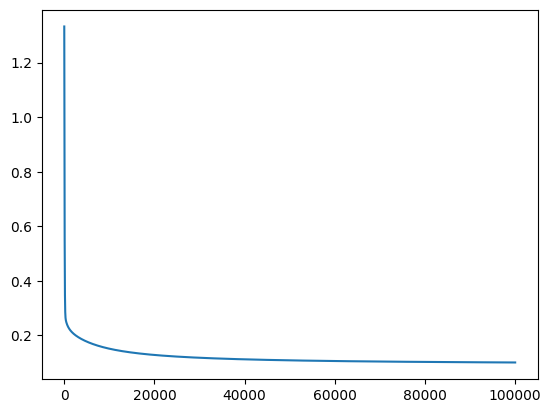

In [14]:
W_final, b_final = perceptron(X, y, 0.01, 100000)

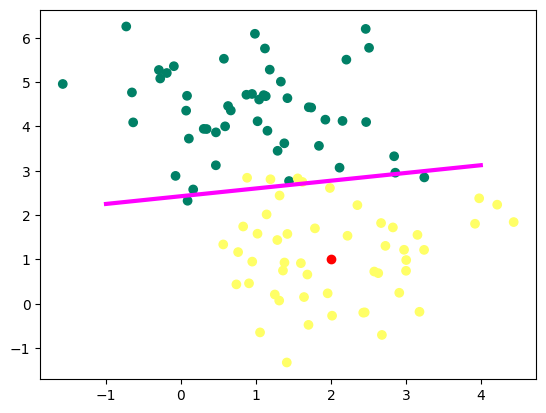

In [15]:
new_search = np.array([2, 1])
x0 = np.linspace(-1, 4, 100)
x1 = (-W_final[0] * x0 - b_final) / W_final[1]
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_search[0], new_search[1], c='r')
plt.plot(x0, x1, c='magenta', lw=3)
plt.show()